In [2]:
import math
import numpy as np

# importing Qiskit
import qiskit as q
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, assemble, transpile
from qiskit.visualization import plot_histogram, plot_bloch_multivector

# import basic plot tools
from qiskit.visualization import plot_histogram

# Loading your IBM Quantum account(s)
IBMQ.save_account("TOKEN", overwrite= True)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-08-21 08:23:32,946: Credentials are already in use. The existing account in the session will be replaced.


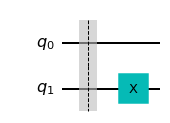

In [3]:
constant_oracle = QuantumCircuit(2)
constant_oracle.barrier()
constant_oracle.x(1)
constant_oracle.draw("mpl")

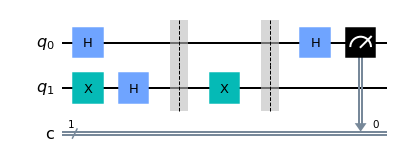

In [5]:
circuit = QuantumCircuit(2, 1)
circuit.h(0)
circuit.x(1)
circuit.h(1)
circuit.compose(constant_oracle, inplace= True)
circuit.barrier()
circuit.h(0)
circuit.measure([0], [0])
circuit.draw("mpl")

In [8]:
backend = backend = provider.backend.ibm_oslo

In [ ]:
from qiskit.tools.monitor import job_monitor

transpiled_dj_circuit = transpile(circuit, backend, optimization_level=3)
job = backend.run(transpiled_dj_circuit)
job_monitor(job, interval=2)

Job Status: job is queued (323)   

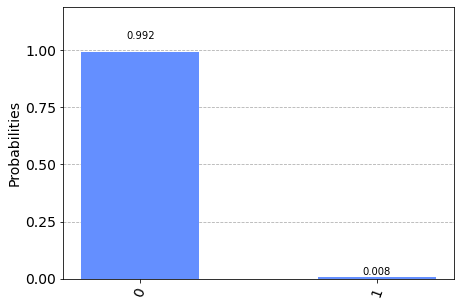

In [12]:
results = job.result()
answer = results.get_counts()

plot_histogram(answer)